In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = np.array((3.34,3.32,3.37,3.38,3.32,3.37,3.34,3.3,3.35,3.43,3.48,3.48,3.49,3.56,3.63,3.58,3.62,3.68,3.62,3.66,3.71,3.7,3.74,3.71,3.7,3.7
                 ,3.73,3.69,3.99,4,3.93,3.96,3.94,3.95,3.98,3.96,3.96,4.02,4.04))
df = pd.DataFrame(data, columns = ['Xbar'])
# Inspect the dataset
df.head()

,Xbar
0,3.34
1,3.32
2,3.37
3,3.38
4,3.32


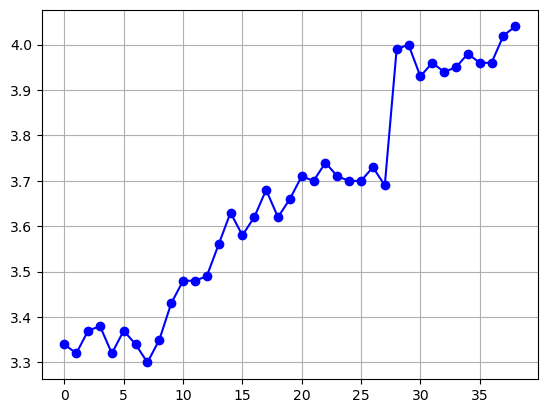

In [2]:
# Plot the data first
plt.plot(df, color='b', linestyle='-', marker='o')
plt.grid()
plt.show()

Runs test p-value = 0.000


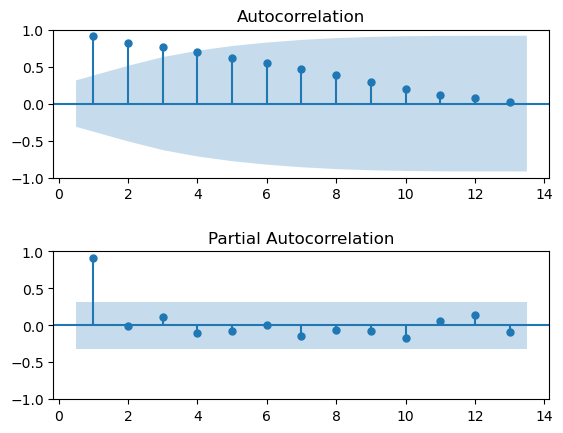

In [3]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(df['Xbar'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()


In [4]:
df['lag1'] = df['Xbar'].shift(1)
df['week']=np.arange(1,40,1)

# and split the dataset into regressors and target
X = df.iloc[1:, 1:]
y = df.iloc[1:, 0]

In [5]:
import qda
stepwise = qda.StepwiseRegression(add_constant = True, direction = 'both', alpha_to_enter = 0.15, alpha_to_remove = 0.15)

# Fit the model
model = stepwise.fit(y, X)

Stepwise Regression

######################################
### Step 1
-------------------
Forward Selection

COEFFICIENTS
------------
 Term     Coef      P-Value
const 3.242209 7.313744e-53
 week 0.020778 1.473823e-23

MODEL SUMMARY
-------------
       S     R-sq  R-sq(adj)
0.059256 0.939783   0.938111

######################################
### Step 2
-------------------
Forward Selection

COEFFICIENTS
------------
 Term     Coef  P-Value
const 1.818908 0.000546
 week 0.011733 0.000658
 lag1 0.440776 0.005214

MODEL SUMMARY
-------------
       S     R-sq  R-sq(adj)
0.053672 0.951969   0.949224
-------------------
Backward Elimination

No predictor removed.

######################################
### Step 3
-------------------
Forward Selection
All predictors have been included in the model. Exiting stepwise.
-------------------


In [6]:
results = model.model_fit
qda.summary(results)

REGRESSION EQUATION
-------------------
Xbar =  + 1.819 const + 0.012 week + 0.441 lag1

COEFFICIENTS
------------
 Term   Coef  SE Coef  T-Value  P-Value
const 1.8189   0.4780   3.8053   0.0005
 week 0.0117   0.0031   3.7399   0.0007
 lag1 0.4408   0.1479   2.9799   0.0052

MODEL SUMMARY
-------------
     S  R-sq  R-sq(adj)
0.0537 0.952     0.9492

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  2.0  1.9983  0.9992 346.8477 8.4457e-24
     const  1.0  0.0417  0.0417  14.4803 5.4617e-04
      week  1.0  0.0403  0.0403  13.9868 6.5779e-04
      lag1  1.0  0.0256  0.0256   8.8797 5.2145e-03
     Error 35.0  0.1008  0.0029      NaN        NaN
     Total 37.0  2.0992     NaN      NaN        NaN


>## Removing outlier from residuals

In [13]:
#Check on residuals
residuals = results.resid
residuals.pop(28)
fits = results.fittedvalues
fits.pop(28)

3.785638588692006

Shapiro-Wilk test p-value = 0.815


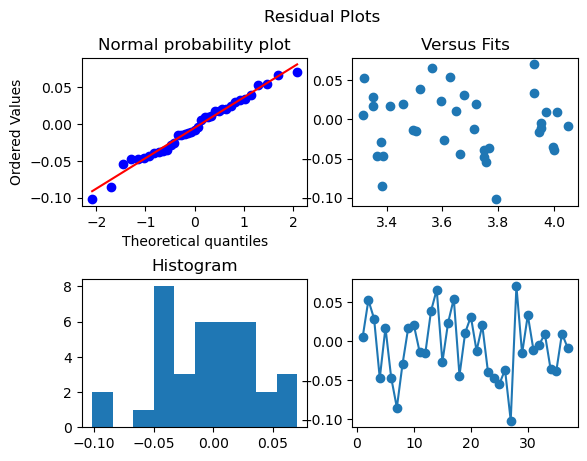

In [14]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the residuals
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(fits, residuals)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals)+1), residuals, 'o-')
plt.show()

Runs test p-value on the residuals = 0.402


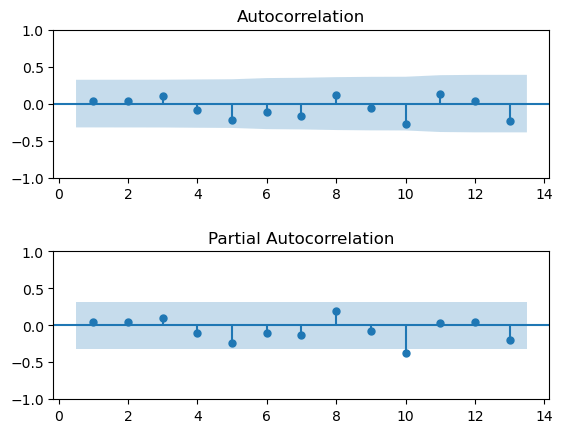

In [15]:
#RANDOMNESS OF FESIDUALS
_, pval_runs_res = runstest_1samp(residuals, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(residuals, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(residuals, lags = int(len(data)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

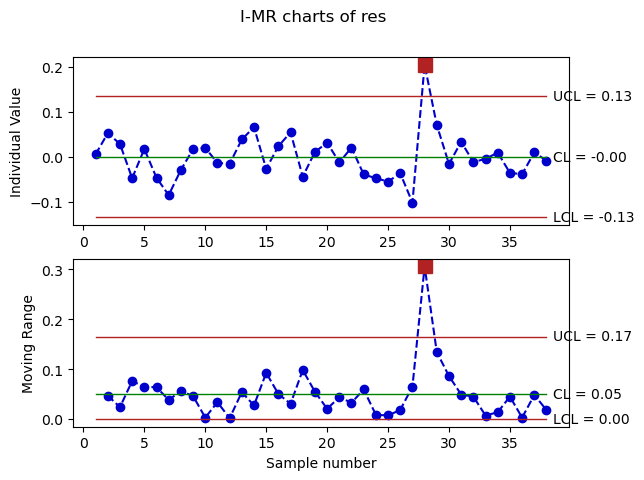

In [16]:
# Put the residuals in a dataframe
df_SCC = pd.DataFrame(results.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res')

> ## Point 2

In [18]:
df['dummy']=np.zeros(39)
df['dummy'][28]=1

c:\Users\Salam\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
import statsmodels.api as sm

x = df[['lag1', 'week', 'dummy']][1:]
x = sm.add_constant(x) 
y = df['Xbar'][1:]
model = sm.OLS(y, x).fit()

qda.summary(model)

REGRESSION EQUATION
-------------------
Xbar =  + 1.003 const + 0.694 lag1 + 0.006 week + 0.249 dummy

COEFFICIENTS
------------
 Term   Coef  SE Coef  T-Value    P-Value
const 1.0030   0.3685   2.7219 1.0161e-02
 lag1 0.6943   0.1141   6.0851 6.6789e-07
 week 0.0061   0.0024   2.4875 1.7932e-02
dummy 0.2489   0.0423   5.8827 1.2230e-06

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0383 0.9762     0.9741

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  3.0  2.0492  0.6831 464.7900 1.1885e-27
     const  1.0  0.0109  0.0109   7.4089 1.0161e-02
      lag1  1.0  0.0544  0.0544  37.0290 6.6789e-07
      week  1.0  0.0091  0.0091   6.1875 1.7932e-02
     dummy  1.0  0.0509  0.0509  34.6061 1.2230e-06
     Error 34.0  0.0500  0.0015      NaN        NaN
     Total 37.0  2.0992     NaN      NaN        NaN


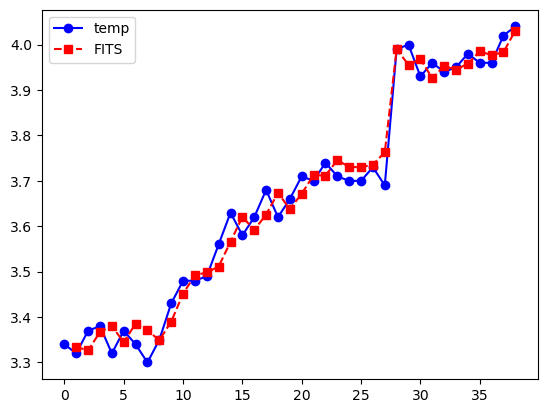

In [20]:
plt.plot(df['Xbar'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(model.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

Shapiro-Wilk test p-value on the residuals = 0.342


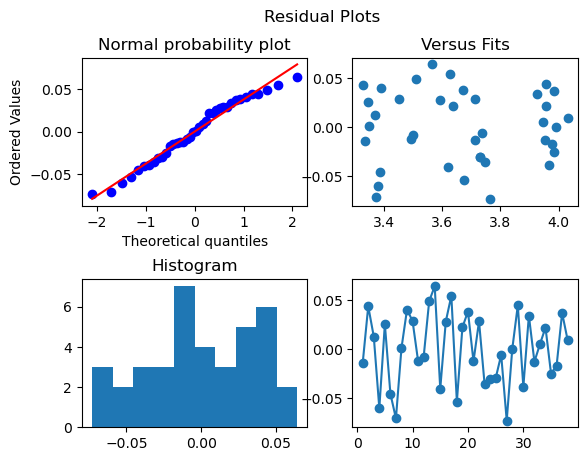

In [21]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

Runs test p-value on the residuals = 0.498


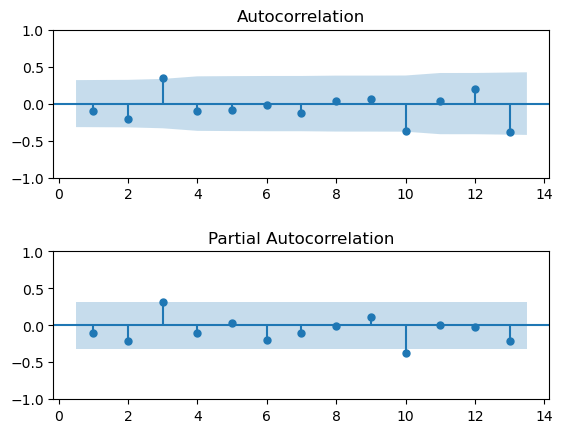

In [22]:
_, pval_runs_res = runstest_1samp(model.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

# Bartlett's  (We don't check it)

In [27]:
from statsmodels.tsa.stattools import acf

n = len(model.resid)

#autocorrelation function
[acf_values, lbq, _] = acf(model.resid, nlags = int(np.sqrt(n)), qstat=True, fft = False)
#Bartlett's test at lag 1
alpha = 0.05
lag_test = 3
rk = acf_values[lag_test]
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(n)))

if rk>z_alpha2/np.sqrt(n):
    print('The null hypothesis is rejected')
else: print('The null hypothesis is accepted')

Test statistic rk = 0.348269
Rejection region starts at 0.317948
The null hypothesis is rejected


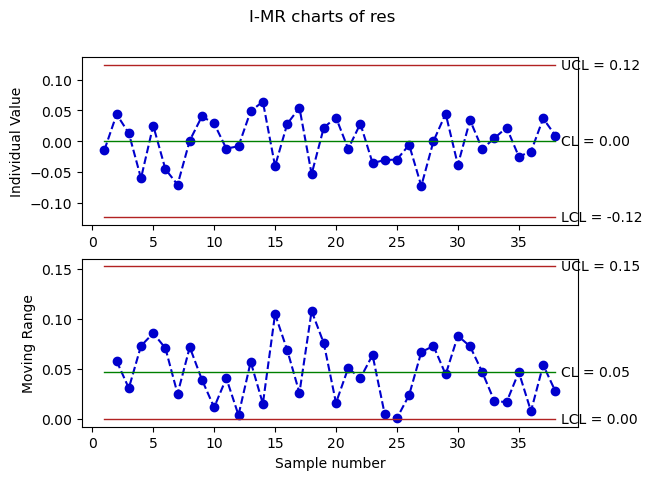

In [23]:
df_SCC = pd.DataFrame({'res': model.resid})
df_SCC = qda.ControlCharts.IMR(df_SCC, 'res')

>## Point 3

In [28]:
print(model.params)

const    1.0030
lag1     0.6943
week     0.0061
dummy    0.2489
dtype: float64


In [29]:
data_predict = pd.DataFrame({'const': [1],'lag1': [df['Xbar'].iat[-1]], 'week': [40], 'dummy':[0] })

In [30]:
#predict the next value
prediction = model.predict(data_predict)
print('The predicted value is %.3f.' % (prediction[0]))

The predicted value is 4.051.


In [31]:
# Compute the fit, confidence intervals and prediction intervals
prediction_summary = model.get_prediction(data_predict).summary_frame(alpha=0.05)
print(prediction_summary)

     mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  4.0509   0.0131         4.0243         4.0775        3.9686        4.1332
